# 1.Data Preparation / Pre-processing

In [1]:
import pandas as pd

In [2]:
# verses = pd.read_csv('verses.csv')
# data = pd.read_csv('file1.csv', on_bad_lines='skip')
df = pd.read_csv('verses_bible.csv', sep='|', header=[0])
df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'verses_bible.csv'

## 1.1 Remove Punctuation

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
#define punctuation
punct = string.punctuation
text = "Can you use a @smiley face, 'emoji' as a : period instead?"
no_punct = ""

for char in text:
    if char not in punct:
        no_punct = no_punct + char
        
# display the unpuncted string
no_punct

'Can you use a smiley face emoji as a  period instead'

In [6]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['context_nopunc'] = df['context'].apply(lambda x: remove_punct(x))
df.head()

,verse,context,context_nopunc
0,1:1,"The Revelation of Jesus Christ, which God gave...",The Revelation of Jesus Christ which God gave ...
1,1:2,"Who barerecord of the word of God, and of the ...",Who barerecord of the word of God and of the t...
2,1:3,"Blessed is he that readeth, and they that hear...",Blessed is he that readeth and they that hear ...
3,1:4,John to the seven churches which are in Asia: ...,John to the seven churches which are in Asia G...
4,1:5,"And from JesusChrist, who is the faithful witn...",And from JesusChrist who is the faithful witne...


## 1.2 Lowercase

In [7]:
'nlp'=='NLP'.lower()

True

In [8]:
#add lower to teh remove_punc function

#list comprhansion 
#lambda function
#adding join to join chars into words 
def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['context_nopunc'] = df['context'].apply(lambda x: remove_punct(x.lower()))
df.head()

,verse,context,context_nopunc
0,1:1,"The Revelation of Jesus Christ, which God gave...",the revelation of jesus christ which god gave ...
1,1:2,"Who barerecord of the word of God, and of the ...",who barerecord of the word of god and of the t...
2,1:3,"Blessed is he that readeth, and they that hear...",blessed is he that readeth and they that hear ...
3,1:4,John to the seven churches which are in Asia: ...,john to the seven churches which are in asia g...
4,1:5,"And from JesusChrist, who is the faithful witn...",and from jesuschrist who is the faithful witne...


## 1.3 Tokenization

In [9]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

In [10]:
text = "Can you use a smiley face emoji as a  period instead"
tokens = re.split('\W+', text)
tokens

['Can',
 'you',
 'use',
 'a',
 'smiley',
 'face',
 'emoji',
 'as',
 'a',
 'period',
 'instead']

In [11]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['context_tokenized'] = df['context_nopunc'].apply(lambda x: tokenize(x))
df.head()

,verse,context,context_nopunc,context_tokenized
0,1:1,"The Revelation of Jesus Christ, which God gave...",the revelation of jesus christ which god gave ...,"[the, revelation, of, jesus, christ, which, go..."
1,1:2,"Who barerecord of the word of God, and of the ...",who barerecord of the word of god and of the t...,"[who, barerecord, of, the, word, of, god, and,..."
2,1:3,"Blessed is he that readeth, and they that hear...",blessed is he that readeth and they that hear ...,"[blessed, is, he, that, readeth, and, they, th..."
3,1:4,John to the seven churches which are in Asia: ...,john to the seven churches which are in asia g...,"[john, to, the, seven, churches, which, are, i..."
4,1:5,"And from JesusChrist, who is the faithful witn...",and from jesuschrist who is the faithful witne...,"[and, from, jesuschrist, who, is, the, faithfu..."


## 1.4 stop words

In [12]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [13]:
stopwords_En = nltk.corpus.stopwords.words('english')

In [14]:
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['context_nostop'] = df['context_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,verse,context,context_nopunc,context_tokenized,context_nostop
0,1:1,"The Revelation of Jesus Christ, which God gave...",the revelation of jesus christ which god gave ...,"[the, revelation, of, jesus, christ, which, go...","[revelation, jesus, christ, god, gave, unto, s..."
1,1:2,"Who barerecord of the word of God, and of the ...",who barerecord of the word of god and of the t...,"[who, barerecord, of, the, word, of, god, and,...","[barerecord, word, god, testimony, jesus, chri..."
2,1:3,"Blessed is he that readeth, and they that hear...",blessed is he that readeth and they that hear ...,"[blessed, is, he, that, readeth, and, they, th...","[blessed, readeth, hear, words, thisprophecy, ..."
3,1:4,John to the seven churches which are in Asia: ...,john to the seven churches which are in asia g...,"[john, to, the, seven, churches, which, are, i...","[john, seven, churches, asia, grace, unto, you..."
4,1:5,"And from JesusChrist, who is the faithful witn...",and from jesuschrist who is the faithful witne...,"[and, from, jesuschrist, who, is, the, faithfu...","[jesuschrist, faithful, witness, first, begott..."


## 1.4 Stemming

In [16]:
import nltk
ps= nltk.PorterStemmer();

In [17]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [18]:
print(ps.stem('play'))
print(ps.stem('playing'))
print(ps.stem('played'))
print(ps.stem('plays'))

play
play
play
play


In [19]:
#Over-Steming 
#Over-steaming occurs when two words are stemmed from the same root of different stems. 

print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))

univers
univers
univers


In [20]:
#Under-Steming
#Under-stemming occurs when two words are stemmed from the same root of not a different stems

print(ps.stem('alumnus'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumnu
alumni
alumna


In [21]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['context_stemmed'] = df['context_nostop'].apply(lambda x: stemming(x))
df.head(10)

,verse,context,context_nopunc,context_tokenized,context_nostop,context_stemmed
0,1:1,"The Revelation of Jesus Christ, which God gave...",the revelation of jesus christ which god gave ...,"[the, revelation, of, jesus, christ, which, go...","[revelation, jesus, christ, god, gave, unto, s...","[revel, jesu, christ, god, gave, unto, shewunt..."
1,1:2,"Who barerecord of the word of God, and of the ...",who barerecord of the word of god and of the t...,"[who, barerecord, of, the, word, of, god, and,...","[barerecord, word, god, testimony, jesus, chri...","[barerecord, word, god, testimoni, jesu, chris..."
2,1:3,"Blessed is he that readeth, and they that hear...",blessed is he that readeth and they that hear ...,"[blessed, is, he, that, readeth, and, they, th...","[blessed, readeth, hear, words, thisprophecy, ...","[bless, readeth, hear, word, thispropheci, kee..."
3,1:4,John to the seven churches which are in Asia: ...,john to the seven churches which are in asia g...,"[john, to, the, seven, churches, which, are, i...","[john, seven, churches, asia, grace, unto, you...","[john, seven, church, asia, grace, unto, youan..."
4,1:5,"And from JesusChrist, who is the faithful witn...",and from jesuschrist who is the faithful witne...,"[and, from, jesuschrist, who, is, the, faithfu...","[jesuschrist, faithful, witness, first, begott...","[jesuschrist, faith, wit, first, begotten, the..."
5,1:6,And hath made uskings and priests unto God and...,and hath made uskings and priests unto god and...,"[and, hath, made, uskings, and, priests, unto,...","[hath, made, uskings, priests, unto, god, fath...","[hath, made, usk, priest, unto, god, father, g..."
6,1:7,"Behold, he cometh with clouds; and every eye s...",behold he cometh with clouds and every eye sha...,"[behold, he, cometh, with, clouds, and, every,...","[behold, cometh, clouds, every, eye, shall, se...","[behold, cometh, cloud, everi, eye, shall, see..."
7,1:8,"I am Alpha and Omega, the beginning and the en...",i am alpha and omega the beginning and the end...,"[i, am, alpha, and, omega, the, beginning, and...","[alpha, omega, beginning, ending, saith, thelo...","[alpha, omega, begin, end, saith, thelord, com..."
8,1:9,"I John, who also am your brother, and companio...",i john who also am your brother and companion ...,"[i, john, who, also, am, your, brother, and, c...","[john, also, brother, companion, tribulationan...","[john, also, brother, companion, tribulationan..."
9,1:10,I was in the Spirit on the Lord,i was in the spirit on the lord,"[i, was, in, the, spirit, on, the, lord]","[spirit, lord]","[spirit, lord]"


## 1.4 Lemmatization

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [23]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [24]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [25]:
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universe'))

universal
university
universe


In [26]:
print(wn.lemmatize('alumnus'))
print(wn.lemmatize('alumni'))
print(wn.lemmatize('alumnae'))

alumnus
alumnus
alumna


In [27]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['context_lemmatized'] = df['context_nostop'].apply(lambda x: lemmatizing(x))

df.head(10)

,verse,context,context_nopunc,context_tokenized,context_nostop,context_stemmed,context_lemmatized
0,1:1,"The Revelation of Jesus Christ, which God gave...",the revelation of jesus christ which god gave ...,"[the, revelation, of, jesus, christ, which, go...","[revelation, jesus, christ, god, gave, unto, s...","[revel, jesu, christ, god, gave, unto, shewunt...","[revelation, jesus, christ, god, gave, unto, s..."
1,1:2,"Who barerecord of the word of God, and of the ...",who barerecord of the word of god and of the t...,"[who, barerecord, of, the, word, of, god, and,...","[barerecord, word, god, testimony, jesus, chri...","[barerecord, word, god, testimoni, jesu, chris...","[barerecord, word, god, testimony, jesus, chri..."
2,1:3,"Blessed is he that readeth, and they that hear...",blessed is he that readeth and they that hear ...,"[blessed, is, he, that, readeth, and, they, th...","[blessed, readeth, hear, words, thisprophecy, ...","[bless, readeth, hear, word, thispropheci, kee...","[blessed, readeth, hear, word, thisprophecy, k..."
3,1:4,John to the seven churches which are in Asia: ...,john to the seven churches which are in asia g...,"[john, to, the, seven, churches, which, are, i...","[john, seven, churches, asia, grace, unto, you...","[john, seven, church, asia, grace, unto, youan...","[john, seven, church, asia, grace, unto, youan..."
4,1:5,"And from JesusChrist, who is the faithful witn...",and from jesuschrist who is the faithful witne...,"[and, from, jesuschrist, who, is, the, faithfu...","[jesuschrist, faithful, witness, first, begott...","[jesuschrist, faith, wit, first, begotten, the...","[jesuschrist, faithful, witness, first, begott..."
5,1:6,And hath made uskings and priests unto God and...,and hath made uskings and priests unto god and...,"[and, hath, made, uskings, and, priests, unto,...","[hath, made, uskings, priests, unto, god, fath...","[hath, made, usk, priest, unto, god, father, g...","[hath, made, uskings, priest, unto, god, fathe..."
6,1:7,"Behold, he cometh with clouds; and every eye s...",behold he cometh with clouds and every eye sha...,"[behold, he, cometh, with, clouds, and, every,...","[behold, cometh, clouds, every, eye, shall, se...","[behold, cometh, cloud, everi, eye, shall, see...","[behold, cometh, cloud, every, eye, shall, see..."
7,1:8,"I am Alpha and Omega, the beginning and the en...",i am alpha and omega the beginning and the end...,"[i, am, alpha, and, omega, the, beginning, and...","[alpha, omega, beginning, ending, saith, thelo...","[alpha, omega, begin, end, saith, thelord, com...","[alpha, omega, beginning, ending, saith, thelo..."
8,1:9,"I John, who also am your brother, and companio...",i john who also am your brother and companion ...,"[i, john, who, also, am, your, brother, and, c...","[john, also, brother, companion, tribulationan...","[john, also, brother, companion, tribulationan...","[john, also, brother, companion, tribulationan..."
9,1:10,I was in the Spirit on the Lord,i was in the spirit on the lord,"[i, was, in, the, spirit, on, the, lord]","[spirit, lord]","[spirit, lord]","[spirit, lord]"


## Zipf's Law

In [28]:
def terms_frequency (list):
    dictionary={}      # store terms in a dictionary (key,value)
    counted_list=[]      # fill in this list with words that are already counted
    for term in list:
        if term not in counted_list:
            freq=list.count(term)
            dictionary[term]=freq
            counted_list.append(term)

    return sorted(dictionary.items(), key=lambda x:x[1], reverse=True)

In [29]:
list = []
for i in range(len(df)):
    list += df['context_stemmed'][i]
terms_freq = terms_frequency(list)
terms_freq

[('shall', 1233),
 ('lord', 976),
 ('unto', 920),
 ('thi', 730),
 ('thou', 684),
 ('god', 612),
 ('thee', 442),
 ('ye', 408),
 ('upon', 332),
 ('said', 278),
 ('hath', 277),
 ('come', 274),
 ('man', 271),
 ('day', 268),
 ('say', 267),
 ('let', 264),
 ('one', 257),
 ('peopl', 218),
 ('hand', 213),
 ('saith', 213),
 ('also', 210),
 ('earth', 203),
 ('land', 203),
 ('israel', 192),
 ('thing', 189),
 ('us', 185),
 ('hast', 185),
 ('name', 170),
 ('great', 169),
 ('son', 166),
 ('behold', 161),
 ('hous', 156),
 ('word', 154),
 ('came', 152),
 ('heaven', 149),
 ('shalt', 145),
 ('go', 145),
 ('men', 145),
 ('like', 144),
 ('jesu', 142),
 ('king', 142),
 ('even', 141),
 ('made', 135),
 ('way', 135),
 ('ever', 133),
 ('make', 130),
 ('therefor', 128),
 ('holi', 127),
 ('prais', 124),
 ('work', 122),
 ('children', 122),
 ('forth', 122),
 ('give', 120),
 ('know', 119),
 ('thu', 118),
 ('among', 117),
 ('thereof', 116),
 ('offer', 116),
 ('citi', 115),
 ('neither', 115),
 ('side', 115),
 ('gate',

In [30]:
print(len(df))

4517


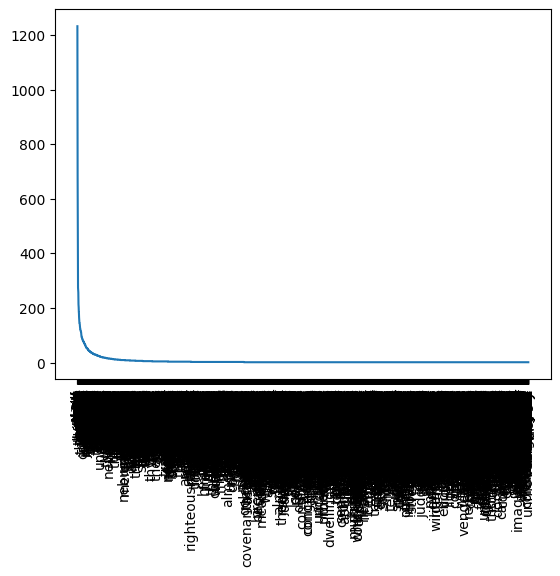

In [31]:
import matplotlib.pyplot as plt
x, y = zip(*terms_freq)
plt.xticks(rotation=90)
plt.plot(x, y)
plt.show()

## Create function to remove punctuation, tokenize, remove stopwords, and stem

In [32]:
### Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['verse','context']]
df['cleaned_text'] = df['context'].apply(lambda x: clean_text(x))
df.head(10)

,verse,context,cleaned_text
0,1:1,"The Revelation of Jesus Christ, which God gave...",revel jesu christ god gave unto shewunto serva...
1,1:2,"Who barerecord of the word of God, and of the ...",barerecord word god testimoni jesu christ ando...
2,1:3,"Blessed is he that readeth, and they that hear...",bless readeth hear word thispropheci keep thin...
3,1:4,John to the seven churches which are in Asia: ...,john seven church asia grace unto youand peac ...
4,1:5,"And from JesusChrist, who is the faithful witn...",jesuschrist faith wit first begotten thedead p...
5,1:6,And hath made uskings and priests unto God and...,hath made usk priest unto god father glori and...
6,1:7,"Behold, he cometh with clouds; and every eye s...",behold cometh cloud everi eye shall see andthe...
7,1:8,"I am Alpha and Omega, the beginning and the en...",alpha omega begin end saith thelord come almighti
8,1:9,"I John, who also am your brother, and companio...",john also brother companion tribulationand kin...
9,1:10,I was in the Spirit on the Lord,spirit lord


## 2. Vectorizing text data

In [33]:
sentences = ["good movie", "not a good movie", "did not like", "i like it"]

### 2.1: Count vectorization

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(sentences)  #Sparse Matrix
print(features_cv.shape)
print('Sparse Matrix :\n', features_cv)
features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = vectorizer.get_feature_names()
features_cv

(4, 6)
Sparse Matrix :
   (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (2, 5)	1
  (2, 0)	1
  (2, 3)	1
  (3, 3)	1
  (3, 2)	1


C:\Users\Sc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,did,good,it,like,movie,not
0,0,1,0,0,1,0
1,0,1,0,0,1,1
2,1,0,0,1,0,1
3,0,0,1,1,0,0


In [35]:
from sklearn.feature_extraction.text import CountVectorizer

# To create a Count Vectorizer, we simply need to instantiate one.
# There are special parameters we can set here when making the vectorizer, but
# for the most basic example, it is not needed.


vectorizer = CountVectorizer()
features_CountVec = vectorizer.fit_transform(df['cleaned_text'])  #Sparse_Matrix
print(features_CountVec.shape)
print('Sparse_Matrix :\n', features_CountVec)

# كان----- sparce matrice------ حولناها ل ماتريس عادىة----
features_CountVec = pd.DataFrame(features_CountVec.toarray())
features_CountVec.columns = vectorizer.get_feature_names()
features_CountVec

(4517, 7796)
Sparse_Matrix :
   (0, 5117)	1
  (0, 3464)	1
  (0, 1276)	1
  (0, 2485)	1
  (0, 2433)	1
  (0, 7102)	2
  (0, 5539)	1
  (0, 5390)	2
  (0, 6691)	1
  (0, 4120)	1
  (0, 5557)	1
  (0, 1339)	1
  (0, 4649)	1
  (0, 5380)	1
  (0, 5598)	1
  (0, 464)	1
  (0, 3479)	1
  (1, 3464)	1
  (1, 1276)	1
  (1, 2485)	1
  (1, 6691)	1
  (1, 732)	1
  (1, 7649)	1
  (1, 6046)	1
  (1, 368)	1
  :	:
  (4514, 2457)	1
  (4514, 1260)	1
  (4514, 4014)	1
  (4514, 3423)	1
  (4514, 3564)	1
  (4514, 4725)	1
  (4514, 64)	1
  (4515, 199)	2
  (4515, 2817)	2
  (4515, 3394)	1
  (4515, 1861)	2
  (4516, 3756)	2
  (4516, 3585)	1
  (4516, 7653)	1
  (4516, 7697)	2
  (4516, 3568)	1
  (4516, 6496)	1
  (4516, 1025)	1
  (4516, 5808)	1
  (4516, 7193)	1
  (4516, 853)	1
  (4516, 2250)	1
  (4516, 7092)	1
  (4516, 20)	1
  (4516, 6122)	1


C:\Users\Sc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,abaddon,abarim,abdon,abett,abhor,abhorreth,abhorringunto,abid,abideth,...,zedekiah,zedekiahrebel,zeeb,zephaniah,zin,zion,zionappeareth,zionto,zionwherein,zoan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2.2: Vectorizing Data: N-Grams

In [45]:
# ngram = term -> 2terms -> 3terms
ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vect.fit_transform(df['cleaned_text'])

print(features_ngram.shape)
print('Sparse Matrix :\n', features_ngram)

features_ngram = pd.DataFrame(features_ngram.toarray())
features_ngram.columns = ngram_vect.get_feature_names()
features_ngram

(4517, 77884)
Sparse Matrix :
   (0, 49709)	1
  (0, 31439)	1
  (0, 9936)	1
  (0, 23104)	1
  (0, 22116)	1
  (0, 69826)	2
  (0, 56189)	1
  (0, 53300)	2
  (0, 65568)	1
  (0, 40996)	1
  (0, 56334)	1
  (0, 10559)	1
  (0, 44852)	1
  (0, 53205)	1
  (0, 56721)	1
  (0, 2723)	1
  (0, 31700)	1
  (0, 49710)	1
  (0, 31459)	1
  (0, 9956)	1
  (0, 23294)	1
  (0, 22196)	1
  (0, 70615)	1
  (0, 56190)	1
  (0, 53410)	1
  :	:
  (4516, 63563)	1
  (4516, 5815)	1
  (4516, 76989)	1
  (4516, 59188)	1
  (4516, 69797)	1
  (4516, 154)	1
  (4516, 36125)	1
  (4516, 20528)	1
  (4516, 32984)	1
  (4516, 61637)	1
  (4516, 72066)	1
  (4516, 63564)	1
  (4516, 5816)	1
  (4516, 7237)	1
  (4516, 76990)	1
  (4516, 59189)	1
  (4516, 69798)	1
  (4516, 155)	1
  (4516, 75886)	1
  (4516, 36126)	1
  (4516, 20529)	1
  (4516, 76767)	1
  (4516, 32985)	1
  (4516, 61638)	1
  (4516, 33196)	1


C:\Users\Sc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,aaron among,aaron among priest,aaron chosen,aaron hundr,aaron hundr twenti,aaron priest,aaron priest hisson,aaron priest went,aaron saint,...,zionappeareth god,zionto,zionto give,zionto give unto,zionwherein,zionwherein thou,zionwherein thou hast,zoan,zoan andwil,zoan andwil execut
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4514,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# الفرق بيناتهم انك تحسب الوزن تاع الكلمة و ليس عدد التكررا فقط
#  w = TF * IDF

### 4.2.3: Vectorizing Raw Data: TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(2,2))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])

print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)

features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf.head(20)

(4517, 32978)
Sparse Matrix :
   (0, 22874)	0.2475639569642476
  (0, 29865)	0.22155811656900565
  (0, 1178)	0.2360561892650883
  (0, 24183)	0.2475639569642476
  (0, 22808)	0.2475639569642476
  (0, 19239)	0.2475639569642476
  (0, 4613)	0.18366858712030312
  (0, 24012)	0.2475639569642476
  (0, 17598)	0.2360561892650883
  (0, 27904)	0.22789129814428521
  (0, 22898)	0.2475639569642476
  (0, 23947)	0.2475639569642476
  (0, 29875)	0.2475639569642476
  (0, 9646)	0.22155811656900565
  (0, 10115)	0.2475639569642476
  (0, 4248)	0.2475639569642476
  (0, 13520)	0.1747664689054201
  (0, 21342)	0.2475639569642476
  (1, 27923)	0.3559571107835167
  (1, 967)	0.38668501857115894
  (1, 4242)	0.38668501857115894
  (1, 26195)	0.3559571107835167
  (1, 10266)	0.3559571107835167
  (1, 32038)	0.31111183058366043
  (1, 1998)	0.38668501857115894
  :	:
  (4514, 19675)	0.3276711554809521
  (4514, 20356)	0.29325029763049865
  (4514, 4116)	0.254572198675628
  (4514, 16307)	0.31243968323746046
  (4515, 544)	0.4082482

C:\Users\Sc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron among,aaron chosen,aaron hundr,aaron priest,aaron saint,aaron say,aaron son,aaron thi,aaron trust,abaddon thegreek,...,zion thou,zion time,zion unto,zion vengeanc,zion wildernessjerusalem,zion work,zionappeareth god,zionto give,zionwherein thou,zoan andwil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tokenization / lowercase

In [37]:
import nltk
from nltk.tokenize import word_tokenize

In [38]:
##tokenization

In [39]:
with open("C:/Users/Sc/Desktop/Moodle Master2/My_Home_Works/IR/Lab1/quran.txt" , 'r') as file:
    txt=file.read()
    file.close()
tokenizer=nltk.RegexpTokenizer(r'\w+')
tokenis=tokenizer.tokenize(txt) 
# print(tokenis)

In [40]:
lower=[token.lower() for token in tokenis] 
print(lower)

['1', '1', 'in', 'the', 'name', 'of', 'allah', 'the', 'merciful', 'the', 'most', 'merciful', '1', '2', 'praise', 'be', 'to', 'allah', 'lord', 'of', 'the', 'worlds', '1', '3', 'the', 'merciful', 'the', 'most', 'merciful', '1', '4', 'owner', 'of', 'the', 'day', 'of', 'recompense', '1', '5', 'you', 'alone', 'we', 'worship', 'and', 'you', 'alone', 'we', 'rely', 'for', 'help', '1', '6', 'guide', 'us', 'to', 'the', 'straight', 'path', '1', '7', 'the', 'path', 'of', 'those', 'upon', 'whom', 'you', 'have', 'favored', 'not', 'those', 'upon', 'whom', 'is', 'the', 'anger', 'nor', 'the', 'astray', 'amen', 'please', 'answer', '2', '1', 'aliflaammeem', '2', '2', 'that', 'is', 'the', 'holy', 'book', 'where', 'there', 'is', 'no', 'doubt', 'it', 'is', 'a', 'guidance', 'for', 'the', 'cautious', 'of', 'evil', 'and', 'hell', '2', '3', 'who', 'believe', 'in', 'the', 'unseen', 'and', 'establish', 'the', 'daily', 'prayer', 'who', 'spend', 'out', 'of', 'what', 'we', 'have', 'provided', 'them', '2', '4', 'who'